In [4]:

import sys
import os
import cv2
import numpy as np
import difflib
import matplotlib.pyplot as plt
import glob
from tifffile import imsave
from tifffile import imread

import napari
sys.path.append('../../Terminator/')
from TerminatorUtils.helpers import Prob_to_Binary, zero_pad_color, multiplot,WingArea, multiplotline
import tifffile
try:
    from pathlib import Path
    Path().expanduser()
except (ImportError,AttributeError):
    from pathlib2 import Path
def save_tiff_imagej_compatible(file, img, axes, **imsave_kwargs):
    """Save image in ImageJ-compatible TIFF format.

    Parameters
    ----------
    file : str
        File name
    img : numpy.ndarray
        Image
    axes: str
        Axes of ``img``
    imsave_kwargs : dict, optional
        Keyword arguments for :func:`tifffile.imsave`

    """
   
    # convert to imagej-compatible data type
    t = img.dtype
    if   'float' in t.name: t_new = np.float32
    elif 'uint'  in t.name: t_new = np.uint16 if t.itemsize >= 2 else np.uint8
    elif 'int'   in t.name: t_new = np.int16
    else:                   t_new = t
    img = img.astype(t_new, copy=False)
    if t != t_new:
        warnings.warn("Converting data type from '%s' to ImageJ-compatible '%s'." % (t, np.dtype(t_new)))

 

    imsave_kwargs['imagej'] = True
    imsave(file, img, **imsave_kwargs)
    

In [8]:

Masterdir = '/Users/aimachine/Downloads/Images_For_FAQT'


LeftName = 'L'
RightName = 'R'

MaskResults = Masterdir + '/MaskResults/'




AsymmetryResults = Masterdir + '/AsymmetryResults/'
AsymmetryResultsName = 'Asymmetry'



In [11]:
Raw_path = os.path.join(Masterdir, '*tif')
Left_path = os.path.join(MaskResults, '*tif')

axes = 'YX'
saveaxes = 'YX'
filesRaw = glob.glob(Raw_path)
filesRaw.sort
filesLeft = glob.glob(Left_path)
filesLeft.sort
RawImages = []
LeftImages = []
Name = []
for fname in filesRaw:
  for secondname in filesLeft:
    if os.path.basename(os.path.splitext(secondname)[0]) == 'Mask' + os.path.basename(os.path.splitext(fname)[0]):
            image = imread(fname)
            
            Leftimage = imread(secondname) 
            RawImages.append(image)
            LeftImages.append(Leftimage)
            Name.append(os.path.basename(os.path.splitext(fname)[0]))
           
with napari.gui_qt():
   
    # initialise viewer with Left wing image
    viewer = napari.view_image(np.asarray(RawImages), name='Wings', rgb=True)

    # add the labels
    label_layer = viewer.add_labels(np.asarray(LeftImages), name='segmentation')  
    
    images = [] 
    for i in range(len(filesRaw)):
           viewer.dims.set_point(axis=0, value=i)
           images.append(viewer.screenshot())
    tifffile.imsave(MaskResults + 'Overlays' + '.tif', np.asarray(images))
   

In [13]:
ModifiedArray = viewer.layers['segmentation'].data 

for i in range(0, ModifiedArray.shape[0]):
    
     save_tiff_imagej_compatible((MaskResults + 'Mask' + Name[i] + '.tif' ) , ModifiedArray[i].astype('uint8'), saveaxes)

In [14]:
import pandas as pd
Path(AsymmetryResults).mkdir(exist_ok = True)
Raw_pathRight = os.path.join(MaskResults, '*tif')
Raw_pathLeft = os.path.join(MaskResults, '*tif')

filesRawRight = glob.glob(Raw_pathRight)
filesRawLeft = glob.glob(Raw_pathLeft)


AllRightArea = []
AllLeftArea = []
AllRightMinusLeftArea = []
AllRightPlusLeftArea = []
AllAssymetery = []
AllName = []
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
for fnameRight in filesRawRight:
    
   NameRight = os.path.basename(os.path.splitext(fnameRight)[0]) 
   imageRight = imread(fnameRight)
   for fnameLeft in filesRawLeft:
       NameLeft = os.path.basename(os.path.splitext(fnameLeft)[0]) 
       imageLeft = imread(fnameLeft) 
       
       ChangeName = difflib.ndiff(NameLeft, NameRight)
       delta = ''.join(x[0:] for x in ChangeName if x.startswith('- '))
      
       #ChangeName = NameRight.replace(RightName, LeftName) 
       if delta == '- L':
           print(NameLeft, NameRight)
           RightArea, LeftArea, RightMinusLeft, RightPlusLeft, Assymetery = WingArea(imageLeft, imageRight)
         
           AllName.append(NameLeft)
           AllRightArea.append(RightArea)
           AllLeftArea.append(LeftArea)
           AllRightMinusLeftArea.append(RightMinusLeft)
           AllRightPlusLeftArea.append(RightPlusLeft)
           AllAssymetery.append(Assymetery)
            
df = pd.DataFrame(list(zip(AllRightArea,AllLeftArea,AllRightMinusLeftArea,AllRightPlusLeftArea,AllAssymetery)), index =AllName, 
                                              columns =['RightArea', 'LeftArea', 'Right-Left', 'Right+Left', 'Assymmetery'])

df.to_csv(AsymmetryResults + '/' + AsymmetryResultsName +  '.csv')  
df

MaskC14L MaskC14R
MaskB06L MaskB06R
MaskB10L MaskB10R
MaskC02L MaskC02R
MaskA03L MaskA03R
MaskA02L MaskA02R
MaskD01L MaskD01R
MaskA14L MaskA14R
MaskC03L MaskC03R
MaskB11L MaskB11R
MaskB07L MaskB07R
MaskC15L MaskC15R
MaskC12L MaskC12R
MaskC04L MaskC04R
MaskD06L MaskD06R
MaskA13L MaskA13R
MaskD10L MaskD10R
MaskA05L MaskA05R
MaskC08L MaskC08R
MaskA09L MaskA09R
MaskA08L MaskA08R
MaskC09L MaskC09R
MaskD11L MaskD11R
MaskA04L MaskA04R
MaskD07L MaskD07R
MaskA12L MaskA12R
MaskC05L MaskC05R
MaskB01L MaskB01R
MaskC13L MaskC13R
MaskA07L MaskA07R
MaskD12L MaskD12R
MaskA11L MaskA11R
MaskD04L MaskD04R
MaskC06L MaskC06R
MaskB02L MaskB02R
MaskC10L MaskC10R
MaskD08L MaskD08R
MaskD09L MaskD09R
MaskC11L MaskC11R
MaskB03L MaskB03R
MaskC07L MaskC07R
MaskA10L MaskA10R
MaskD05L MaskD05R
MaskA06L MaskA06R
MaskD13L MaskD13R
MaskB08L MaskB08R
MaskA01L MaskA01R
MaskD14L MaskD14R
MaskD02L MaskD02R
MaskB12L MaskB12R
MaskB04L MaskB04R
MaskB05L MaskB05R
MaskB13L MaskB13R
MaskC01L MaskC01R
MaskD03L MaskD03R
MaskD15L M

,RightArea,LeftArea,Right-Left,Right+Left,Assymmetery
MaskC14L,230508,226894,3614,457402,0.015802
MaskB06L,279472,277523,1949,556995,0.006998
MaskB10L,279213,285140,-5927,564353,-0.021005
MaskC02L,234143,230487,3656,464630,0.015737
MaskA03L,261496,260144,1352,521640,0.005184
MaskA02L,284041,280374,3667,564415,0.012994
MaskD01L,251001,250316,685,501317,0.002733
MaskA14L,291823,293064,-1241,584887,-0.004244
MaskC03L,255889,239712,16177,495601,0.065282
MaskB11L,281311,279542,1769,560853,0.006308


In [15]:
positivecount = np.sum(df['Assymmetery']>0)
negativecount = np.sum(df['Assymmetery']<0)   
print('Positive Count' , positivecount)
print('Negative Count' , negativecount)

Positive Count 47
Negative Count 10


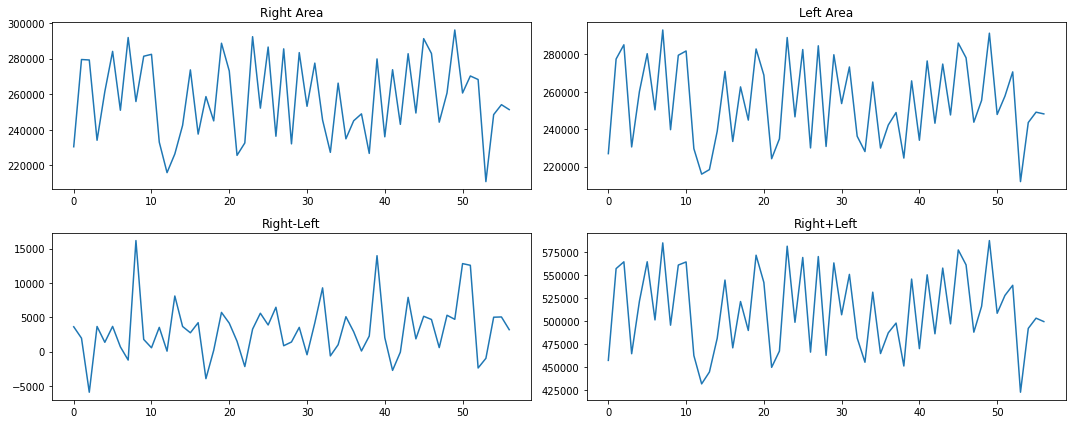

In [16]:
multiplotline(AllRightArea, AllLeftArea, AllRightMinusLeftArea, AllRightPlusLeftArea, 'Right Area', 'Left Area', 'Right-Left', 'Right+Left', targetdir = AsymmetryResults, File = 'Areas', plotTitle = 'Area')


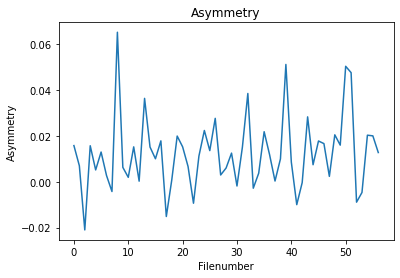

In [17]:
plt.plot(AllAssymetery)
plt.title("Asymmetry")
plt.ylabel("Asymmetry")
plt.xlabel("Filenumber")
plt.show()